In [70]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder

In [71]:
train=pd.read_csv('/home/jak/Downloads/fer2013.csv')

x_train = train.iloc[:28709,1].values
y_train = train.iloc[:28709,0:1].values

In [72]:
x_test = train.iloc[28709:,1].values
y_test = train.iloc[28709:,0:1].values

In [73]:
y_train=OneHotEncoder(categories='auto').fit_transform(y_train).toarray() 

In [74]:
x_test = train.iloc[28709:,1].values
y_test = train.iloc[28709:,0:1].values


In [75]:
y_test=OneHotEncoder(categories='auto').fit_transform(y_test).toarray() 

In [76]:
def arr_to_image(x):
    arr=x.split()   
    arr=np.array(arr)   
    arr=arr.astype(int)    
    a = np.reshape(arr, (48,48))  
    return a

In [77]:
for i in range(0,28709):
     x_train[i]=arr_to_image(x_train[i])
     
for i in range(0,7178):     
     x_test[i]=arr_to_image(x_test[i])

In [78]:
x1=list(x_train)
x2=list(x_test)
    
x1 = np.asarray(x1,dtype=np.uint8)
x2 = np.asarray(x2,dtype=np.uint8)

x1 = x1.reshape(28709,48,48,1)
x2 = x2.reshape(7178,48,48,1)

In [79]:
from keras.models import Sequential
from keras.layers import Convolution2D    as Conv2D ,AveragePooling2D#for dealing with pictures
from keras.layers import Flatten   , MaxPooling2D      #flatten the maps
from keras.layers import Dense  ,Dropout

In [84]:
model = Sequential()
 
#1st convolution layer
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(5,5), strides=(2, 2)))
 
#2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
 
#3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(AveragePooling2D(pool_size=(3,3), strides=(2, 2)))
 
model.add(Flatten())
 
#fully connected neural networks
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
 
model.add(Dense(7, activation='softmax'))

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 44, 44, 64)        1664      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 18, 18, 64)        36928     
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
average_pooling2d_11 (Averag (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 5, 5, 128)         73856     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 3, 3, 128)         147584    
__________

In [85]:
batch_size = 128
epochs = 50

model.compile(loss='binary_crossentropy', optimizer='adam' , metrics=['accuracy'])
steps_per_epoch = len(x1) / batch_size
validation_steps = len(y_test)/ batch_size

In [86]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  
        samplewise_center=False,  
        featurewise_std_normalization=False,  
        samplewise_std_normalization=False,  
        zca_whitening=False,  
        rotation_range=10,  
        zoom_range = 0.0,  
        width_shift_range=0.1,  
        height_shift_range=0.1,  
        horizontal_flip=False, 
        vertical_flip=False)  

datagen.fit(x1)

In [87]:
history = model.fit_generator(datagen.flow(x1, y_train, batch_size=batch_size),
                    steps_per_epoch=x1.shape[0] / batch_size,
                    validation_data=(x2, y_test),
                    epochs = epochs, verbose = 2)

Epoch 1/50
 - 116s - loss: 0.3956 - acc: 0.8558 - val_loss: 0.3846 - val_acc: 0.8565
Epoch 2/50
 - 114s - loss: 0.3774 - acc: 0.8574 - val_loss: 0.3579 - val_acc: 0.8622
Epoch 3/50
 - 114s - loss: 0.3589 - acc: 0.8619 - val_loss: 0.3470 - val_acc: 0.8655
Epoch 4/50
 - 114s - loss: 0.3429 - acc: 0.8673 - val_loss: 0.3221 - val_acc: 0.8743
Epoch 5/50
 - 114s - loss: 0.3325 - acc: 0.8705 - val_loss: 0.3154 - val_acc: 0.8756
Epoch 6/50
 - 114s - loss: 0.3219 - acc: 0.8736 - val_loss: 0.3102 - val_acc: 0.8772
Epoch 7/50
 - 114s - loss: 0.3135 - acc: 0.8762 - val_loss: 0.2983 - val_acc: 0.8808
Epoch 8/50
 - 113s - loss: 0.3051 - acc: 0.8788 - val_loss: 0.2902 - val_acc: 0.8824
Epoch 9/50
 - 114s - loss: 0.3009 - acc: 0.8800 - val_loss: 0.2851 - val_acc: 0.8840
Epoch 10/50
 - 113s - loss: 0.2939 - acc: 0.8827 - val_loss: 0.2929 - val_acc: 0.8829
Epoch 11/50
 - 113s - loss: 0.2925 - acc: 0.8825 - val_loss: 0.2863 - val_acc: 0.8847
Epoch 12/50
 - 113s - loss: 0.2880 - acc: 0.8840 - val_loss: 0.

In [88]:
print(history)

In [95]:
import pickle
with open('/home/jak/Desktop/face2', 'wb') as f:
    pickle.dump(model,f)

In [90]:
import cv2
import pickle
import matplotlib.pyplot as plt

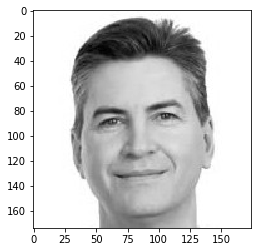

In [91]:
imgpath="/home/jak/Desktop/1.jpg"
img1=cv2.imread(imgpath,0)
plt.imshow(img1,cmap="gray")        #many attributes
plt.show()

In [92]:
def resize2SquareKeepingAspectRation(img, interpolation, size=48):
    h, w = img.shape[:2]
    c = 1 if len(img.shape) < 3 else img.shape[2]
    if h == w: return cv2.resize(img, (size, size), interpolation)
    if h > w: dif = h
    else:     dif = w
    x_pos = int((dif - w)/2.)
    y_pos = int((dif - h)/2.)
    if c is None:
        mask = np.zeros((dif, dif), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w] = img[:h, :w]
    else:
        mask = np.zeros((dif, dif, c), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w, :] = img[:h, :w, :]
    return cv2.resize(mask, (size, size), interpolation)

In [93]:
img1 = resize2SquareKeepingAspectRation(img1, cv2.INTER_AREA)


In [98]:
#img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
array=[]
array.insert(0,img1)
x=np.asarray(array)
x = x.reshape(1,48,48,1)
print(model.predict(x))

[[1.3401456e-01 2.6071796e-04 9.7474351e-04 8.3628070e-01 3.7818670e-03
  8.6039276e-04 2.3827044e-02]]


In [99]:
p=model.predict(x)

In [101]:
mylist=np.array(p).tolist()
ind = np.argmax(mylist)
print(ind+1)

4


In [103]:
if ind==0: print('Angry')
elif ind==1: print('Dsigust')
elif ind==2: print('Fear')
elif ind==3: print('Happy')
elif ind==4: print('Sad')
elif ind==5: print('Surprise')
else :print('Neutral')

Happy
